# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who: A city public works director (and budget team) deciding where to invest in road repairs next quarter.

What: Show which neighborhoods have the highest crash and pothole complaint rates, where response times are slowest, and how targeted repairs could reduce incidents and complaints.

How: A short narrative with one clear takeaway, supported by a simple map or bar chart comparing the top problem areas, a trend line showing changes over time, and a few callouts/annotations that explain the key drivers and the recommended action.

# 3. Homework - work with your own data

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import glob
import os


In [15]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhadramohit/climate-change-dataset")

print("Path to dataset files:", path)


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/bhadramohit/climate-change-dataset/versions/1


In [17]:
csv_files = glob.glob(os.path.join(path, "**", "*.csv"), recursive=True)

print("CSV files found:")
for f in csv_files:
    print(" -", f)

df = pd.read_csv(csv_files[0])

print("\nDataFrame shape:", df.shape)
print(df.head())


CSV files found:
 - /home/codespace/.cache/kagglehub/datasets/bhadramohit/climate-change-dataset/versions/1/climate_change_dataset.csv

DataFrame shape: (1000, 10)
   Year    Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0  2006         UK                   8.9                          9.3   
1  2019        USA                  31.0                          4.8   
2  2014     France                  33.9                          2.8   
3  2010  Argentina                   5.9                          1.8   
4  2007    Germany                  26.9                          5.6   

   Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable Energy (%)  \
0                  3.1           1441   530911230                  20.4   
1                  4.2           2407   107364344                  49.2   
2                  2.2           1241   441101758                  33.3   
3                  3.2           1892  1069669579                  23.7   
4                  2.4

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


In [19]:
df.describe()

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


In [25]:
dupes = df[df.duplicated(keep=False)]
dupes

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)


In [26]:
rows_with_dupes = df[df.apply(lambda r: r.duplicated().any(), axis=1)]
rows_with_dupes


,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
13,2003,USA,27.4,1.8,2.2,766,798905927,27.4,10,14.6
19,2001,Canada,21.3,12.7,3.3,1944,1189649940,21.3,3,26.2
37,2019,Canada,21.8,1.0,4.9,2524,1395185778,5.8,1,51.0
62,2017,South Africa,11.3,0.6,3.0,1005,941922654,41.6,3,40.3
81,2022,Japan,31.9,9.5,5.0,1412,433898990,46.3,5,49.2
83,2020,Russia,23.5,4.8,4.8,926,863711591,25.3,3,43.3
85,2012,Canada,14.0,1.4,2.8,1229,1225949571,31.4,14,54.1
124,2002,South Africa,33.8,6.8,4.0,2381,351991271,8.5,4,62.1
159,2018,UK,22.4,12.0,4.1,1709,1156608764,45.4,12,40.4


In [27]:
print(df.mean)
print(df.median)
print(df.mode)

<bound method DataFrame.mean of      Year    Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0    2006         UK                   8.9                          9.3   
1    2019        USA                  31.0                          4.8   
2    2014     France                  33.9                          2.8   
3    2010  Argentina                   5.9                          1.8   
4    2007    Germany                  26.9                          5.6   
..    ...        ...                   ...                          ...   
995  2019      India                  23.6                          8.0   
996  2000         UK                  21.8                         10.0   
997  2019  Argentina                  23.8                          8.9   
998  2016  Australia                  21.0                         14.9   
999  2011    Germany                  24.1                         17.3   

     Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable Ener

In [ ]:
#null values
df.isna().sum()

Year                           0
Country                        0
Avg Temperature (°C)           0
CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
dtype: int64

In [31]:
#null rows
null_rows = df[df.isna().any(axis=1)]
null_rows


,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)


In [ ]:
#one hot encoding the only non numeric value, Country
country_dummies = pd.get_dummies(df["Country"], prefix="Country", drop_first=True)
df_ohe = pd.concat([df.drop(columns=["Country"]), country_dummies], axis=1)

df_ohe.head()

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),Country_Australia,...,Country_France,Country_Germany,Country_India,Country_Indonesia,Country_Japan,Country_Mexico,Country_Russia,Country_South Africa,Country_UK,Country_USA
0,2006,8.9,9.3,3.1,1441,530911230,20.4,14,59.8,False,...,False,False,False,False,False,False,False,False,True,False
1,2019,31.0,4.8,4.2,2407,107364344,49.2,8,31.0,False,...,False,False,False,False,False,False,False,False,False,True
2,2014,33.9,2.8,2.2,1241,441101758,33.3,9,35.5,False,...,True,False,False,False,False,False,False,False,False,False
3,2010,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7,False,...,False,False,False,False,False,False,False,False,False,False
4,2007,26.9,5.6,2.4,1743,124079175,12.5,4,17.4,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
#dataset looks wonderful. I dont think anything else needs to be changed.
#the only negative side of this dataset is its size. It's only 1000 rows, which is fairly small for building a reliable model.

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

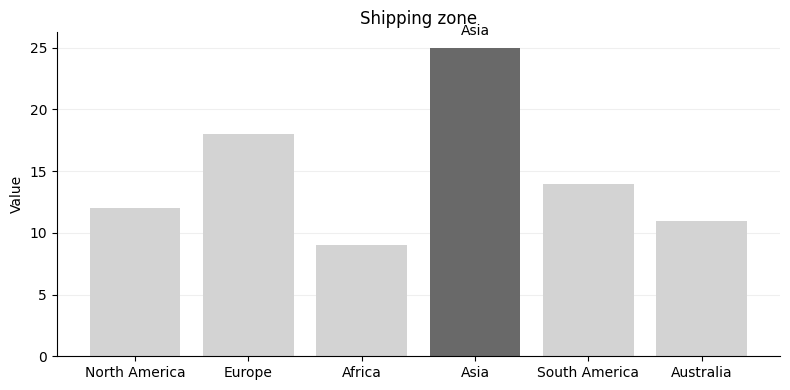

In [36]:
import matplotlib.pyplot as plt

categories = ["North America", "Europe", "Africa", "Asia", "South America", "Australia"]
values     = [12, 18, 9, 25, 14, 11]

highlight = "Asia"  # the one we want to emphasize

colors = ["lightgray"] * len(categories)
hi = categories.index(highlight)
colors[hi] = "dimgray"

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(categories, values, color=colors)

ax.text(hi, values[hi] + 0.8, "Asia", ha="center", va="bottom")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", alpha=0.2)
ax.set_axisbelow(True)

ax.set_title("Shipping zone")
ax.set_ylabel("Value")

plt.tight_layout()
plt.show()
